# AI & Health: Assignment 4

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import graphviz


## Import datafile and display dataframe

In [2]:
medical_data_1 = pd.read_csv('medical example data.csv', parse_dates=True,
                             delimiter=',')
display(medical_data_1)

,Age,Gender,bloodpressure,Cholesterol,Natrium,Kalium,Na/K,Drug
0,23,F,high,high,0.79,0.03,26.33,drugY
1,47,M,low,high,0.74,0.06,12.33,drugC
2,47,M,low,high,0.70,0.07,10.00,drugC
3,28,F,normal,high,0.56,0.07,8.00,drugX
4,61,F,low,high,0.56,0.03,18.67,drugY
5,22,F,normal,high,0.68,0.08,8.50,drugX
6,49,F,normal,high,0.79,0.05,15.80,drugY
7,41,M,low,high,0.77,0.07,11.00,drugC
8,60,M,normal,high,0.78,0.05,15.60,drugY
9,43,M,low,normal,0.53,0.03,17.67,drugY


# Question 3: Decision tree training

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
medical_data_1 = medical_data_1.astype('object')

In [5]:
print(medical_data_1)
medical_data_1.dtypes
medical_data_1.info()

   Age Gender bloodpressure Cholesterol Natrium Kalium   Na/K   Drug
0   23      F          high        high    0.79   0.03  26.33  drugY
1   47      M           low        high    0.74   0.06  12.33  drugC
2   47      M           low        high     0.7   0.07   10.0  drugC
3   28      F        normal        high    0.56   0.07    8.0  drugX
4   61      F           low        high    0.56   0.03  18.67  drugY
5   22      F        normal        high    0.68   0.08    8.5  drugX
6   49      F        normal        high    0.79   0.05   15.8  drugY
7   41      M           low        high    0.77   0.07   11.0  drugC
8   60      M        normal        high    0.78   0.05   15.6  drugY
9   43      M           low      normal    0.53   0.03  17.67  drugY
10  47      F           low        high     0.9   0.08  11.25  drugC
11  34      F          high      normal    0.67   0.03  22.33  drugY
12  43      M           low        high    0.63   0.04  15.75  drugY
13  74      F           low       

In [6]:
X = medical_data_1.copy().drop(['Drug'], axis=1)
y = medical_data_1['Drug'].copy()


In [7]:
X.shape

(17, 7)

In [8]:
X.dtypes

Age              object
Gender           object
bloodpressure    object
Cholesterol      object
Natrium          object
Kalium           object
Na/K             object
dtype: object

In [9]:
age = X['Age'].copy()
natrium = X['Natrium'].copy()
kalium = X['Kalium'].copy()
nak = X['Na/K'].copy()

to_encode = X.copy().iloc[:,1:4]
to_encode = pd.get_dummies(to_encode,drop_first=True)
X = pd.concat([age, to_encode, natrium, kalium, nak], axis=1)

In [10]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                    random_state=0)
clf_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

## Decision tree: first draft plot

In [11]:
display(X)

,Age,Gender_M,bloodpressure_low,bloodpressure_normal,Cholesterol_normal,Natrium,Kalium,Na/K
0,23,0,0,0,0,0.79,0.03,26.33
1,47,1,1,0,0,0.74,0.06,12.33
2,47,1,1,0,0,0.7,0.07,10.0
3,28,0,0,1,0,0.56,0.07,8.0
4,61,0,1,0,0,0.56,0.03,18.67
5,22,0,0,1,0,0.68,0.08,8.5
6,49,0,0,1,0,0.79,0.05,15.8
7,41,1,1,0,0,0.77,0.07,11.0
8,60,1,0,1,0,0.78,0.05,15.6
9,43,1,1,0,1,0.53,0.03,17.67


In [12]:
display(y)

0     drugY
1     drugC
2     drugC
3     drugX
4     drugY
5     drugX
6     drugY
7     drugC
8     drugY
9     drugY
10    drugC
11    drugY
12    drugY
13    drugY
14    drugX
15    drugY
16    drugX
Name: Drug, dtype: object

[Text(223.20000000000002, 190.26, 'X[7] <= 13.965\nentropy = 1.468\nsamples = 17\nvalue = [4, 4, 9]'),
 Text(167.4, 135.9, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'X[0] <= 58.0\nentropy = 0.722\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(55.800000000000004, 27.180000000000007, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(279.0, 135.9, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]')]

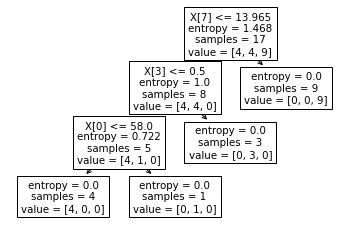

In [13]:
tree.plot_tree(clf_entropy.fit(X, y))

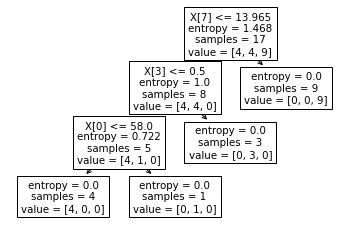

In [14]:
tree.plot_tree(clf_entropy);

## Decision tree: visualization

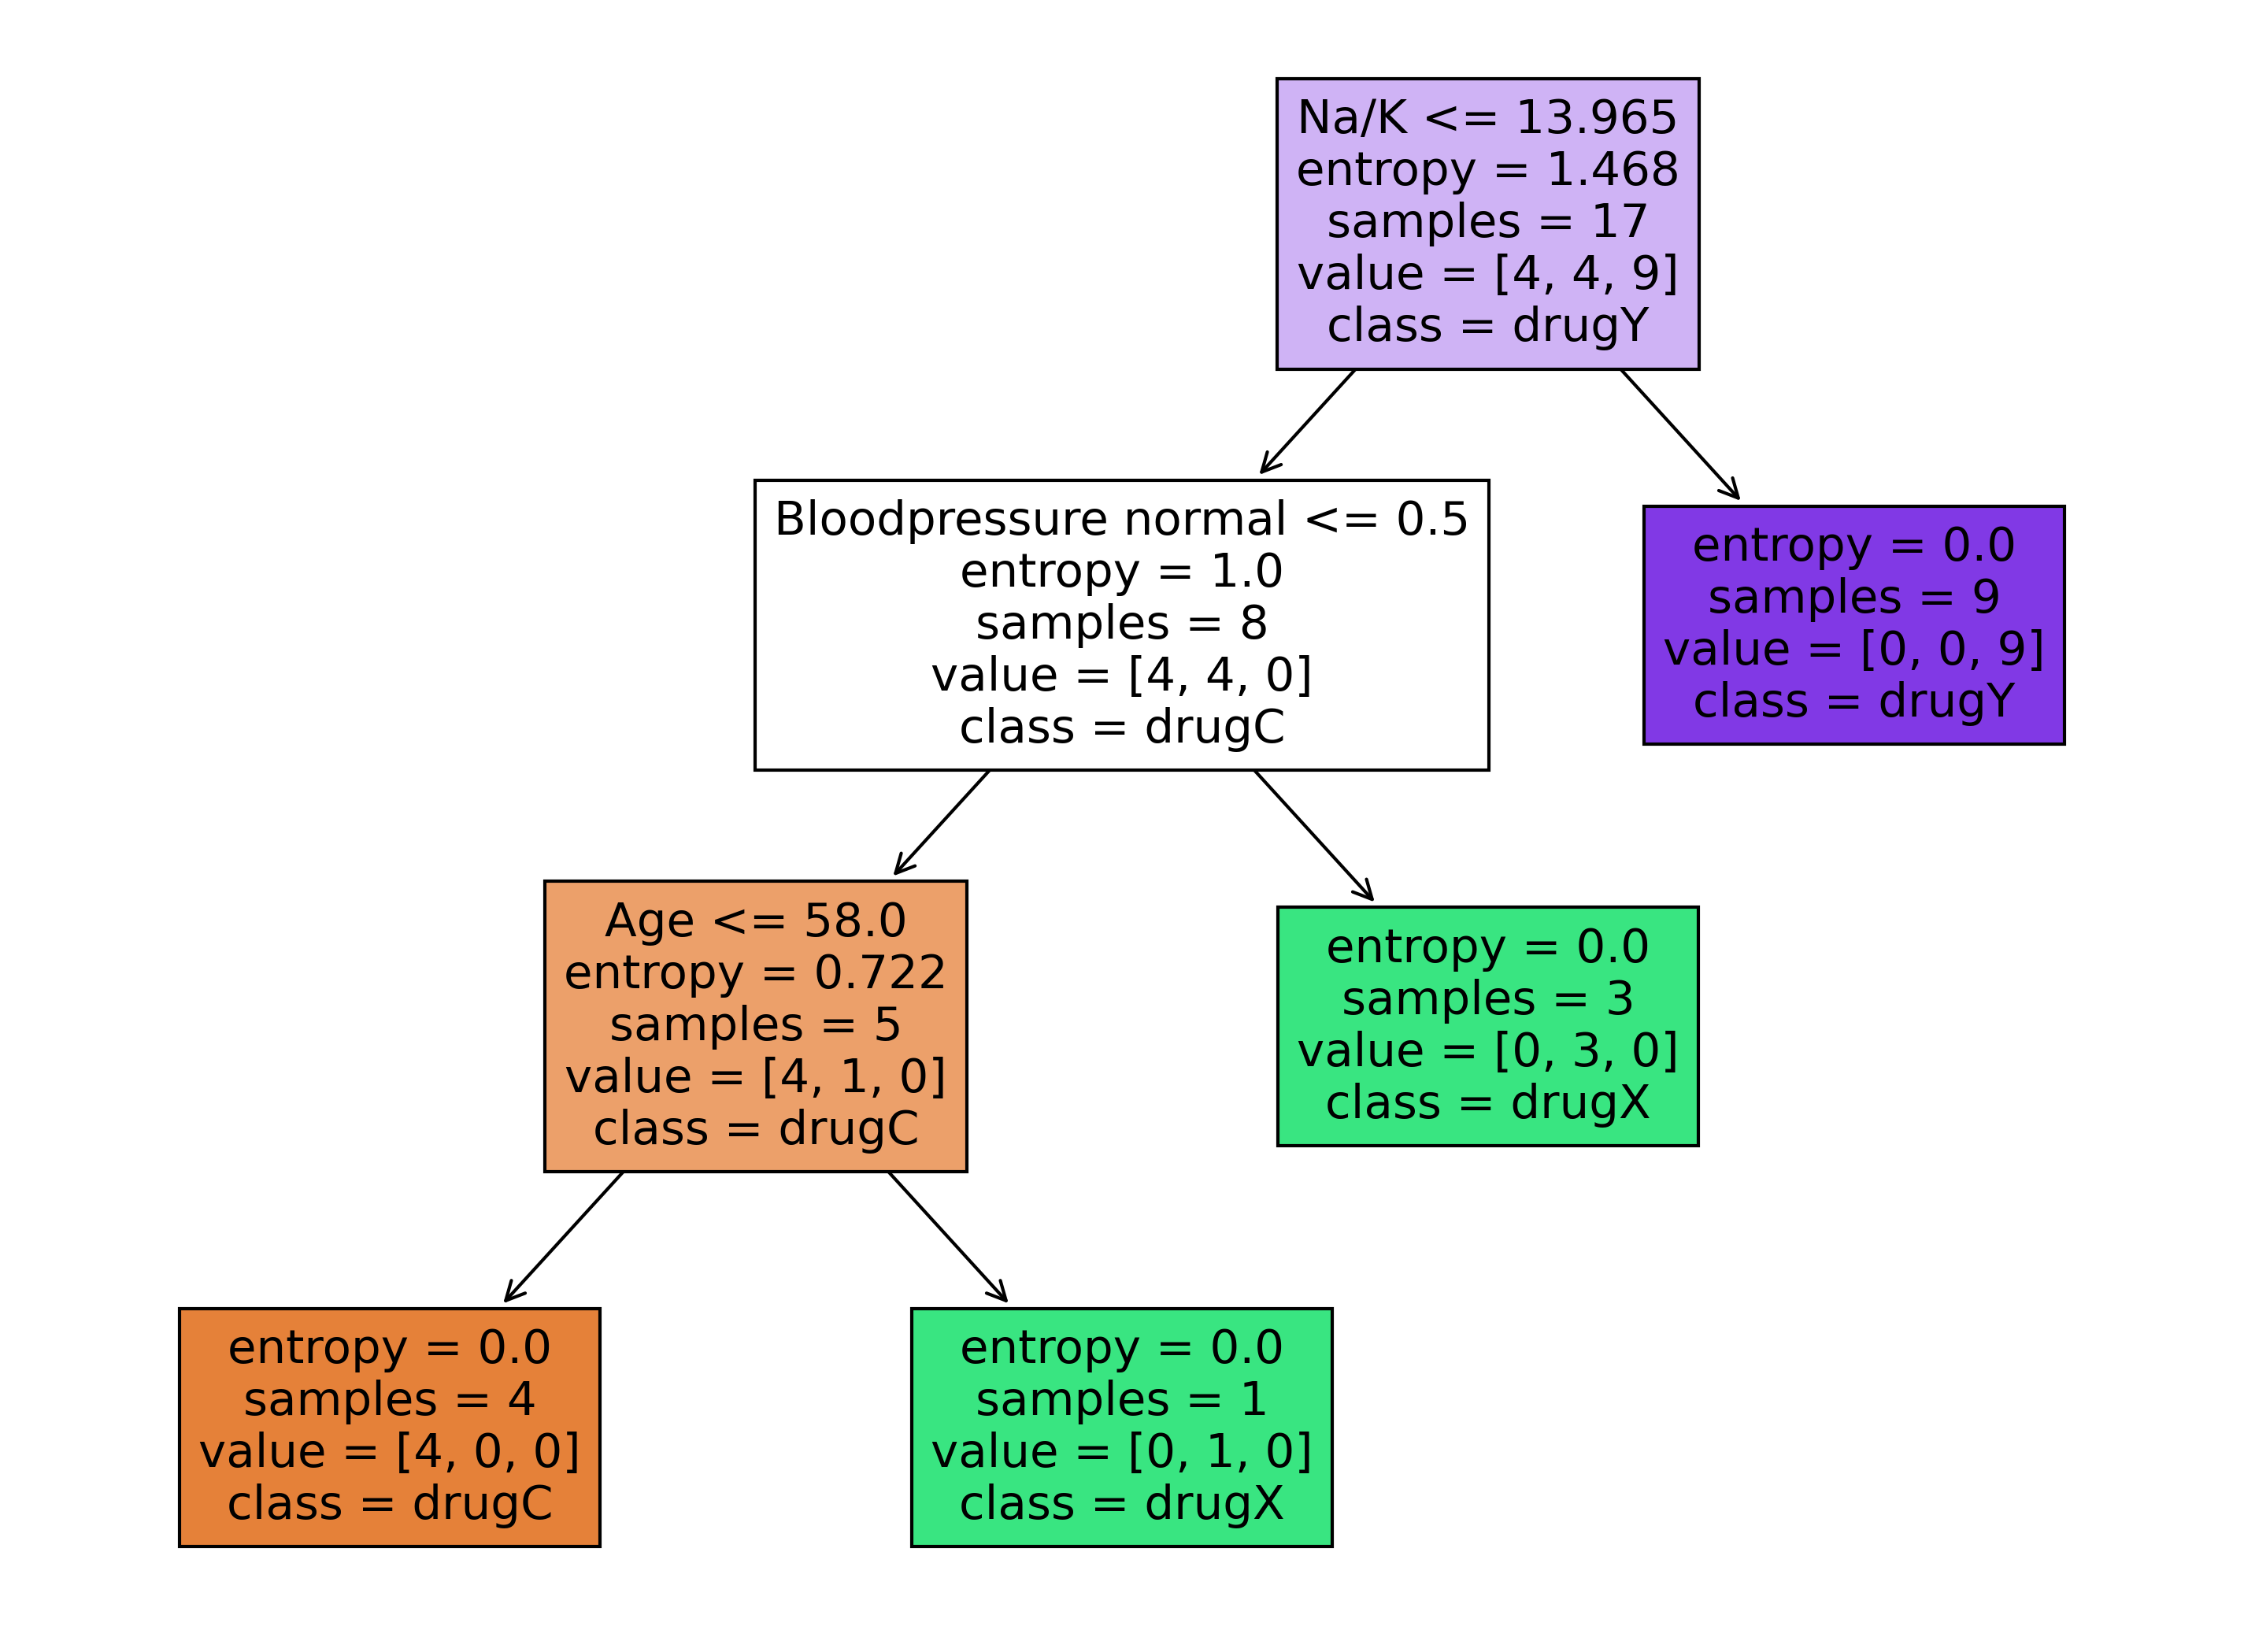

In [15]:
fn=['Age','Male','Bloodpressure normal','Bloodpressure normal','Cholesterol normal','Natrium','Kalium','Na/K']
cn=['drugC', 'drugX', 'drugY']

tree.export_graphviz(clf_entropy,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,9), dpi=300)
tree.plot_tree(clf_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('First_tree.png')



In [16]:
from sklearn.tree import export_text
r = export_text(clf_entropy, feature_names=X.columns.to_list())
print(r)

|--- Na/K <= 13.97
|   |--- bloodpressure_normal <= 0.50
|   |   |--- Age <= 58.00
|   |   |   |--- class: drugC
|   |   |--- Age >  58.00
|   |   |   |--- class: drugX
|   |--- bloodpressure_normal >  0.50
|   |   |--- class: drugX
|--- Na/K >  13.97
|   |--- class: drugY



# Question 4: Adjusted Decision tree

In [17]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
# remove Natrium, Kalium, and the Na/K ratio
X_new = medical_data_1.copy().drop(['Natrium', 'Kalium', 'Na/K', 'Drug'], axis=1)
y_new = medical_data_1['Drug'].copy()

# Re-encode
age = X['Age'].copy()
to_encode = X_new.copy().iloc[:,1:]
to_encode = pd.get_dummies(to_encode,drop_first=True)
X_new = pd.concat([age, to_encode], axis=1)


# create new classifier and train
new_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4,random_state=0)
new_classifier.fit(X_new, y_new)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

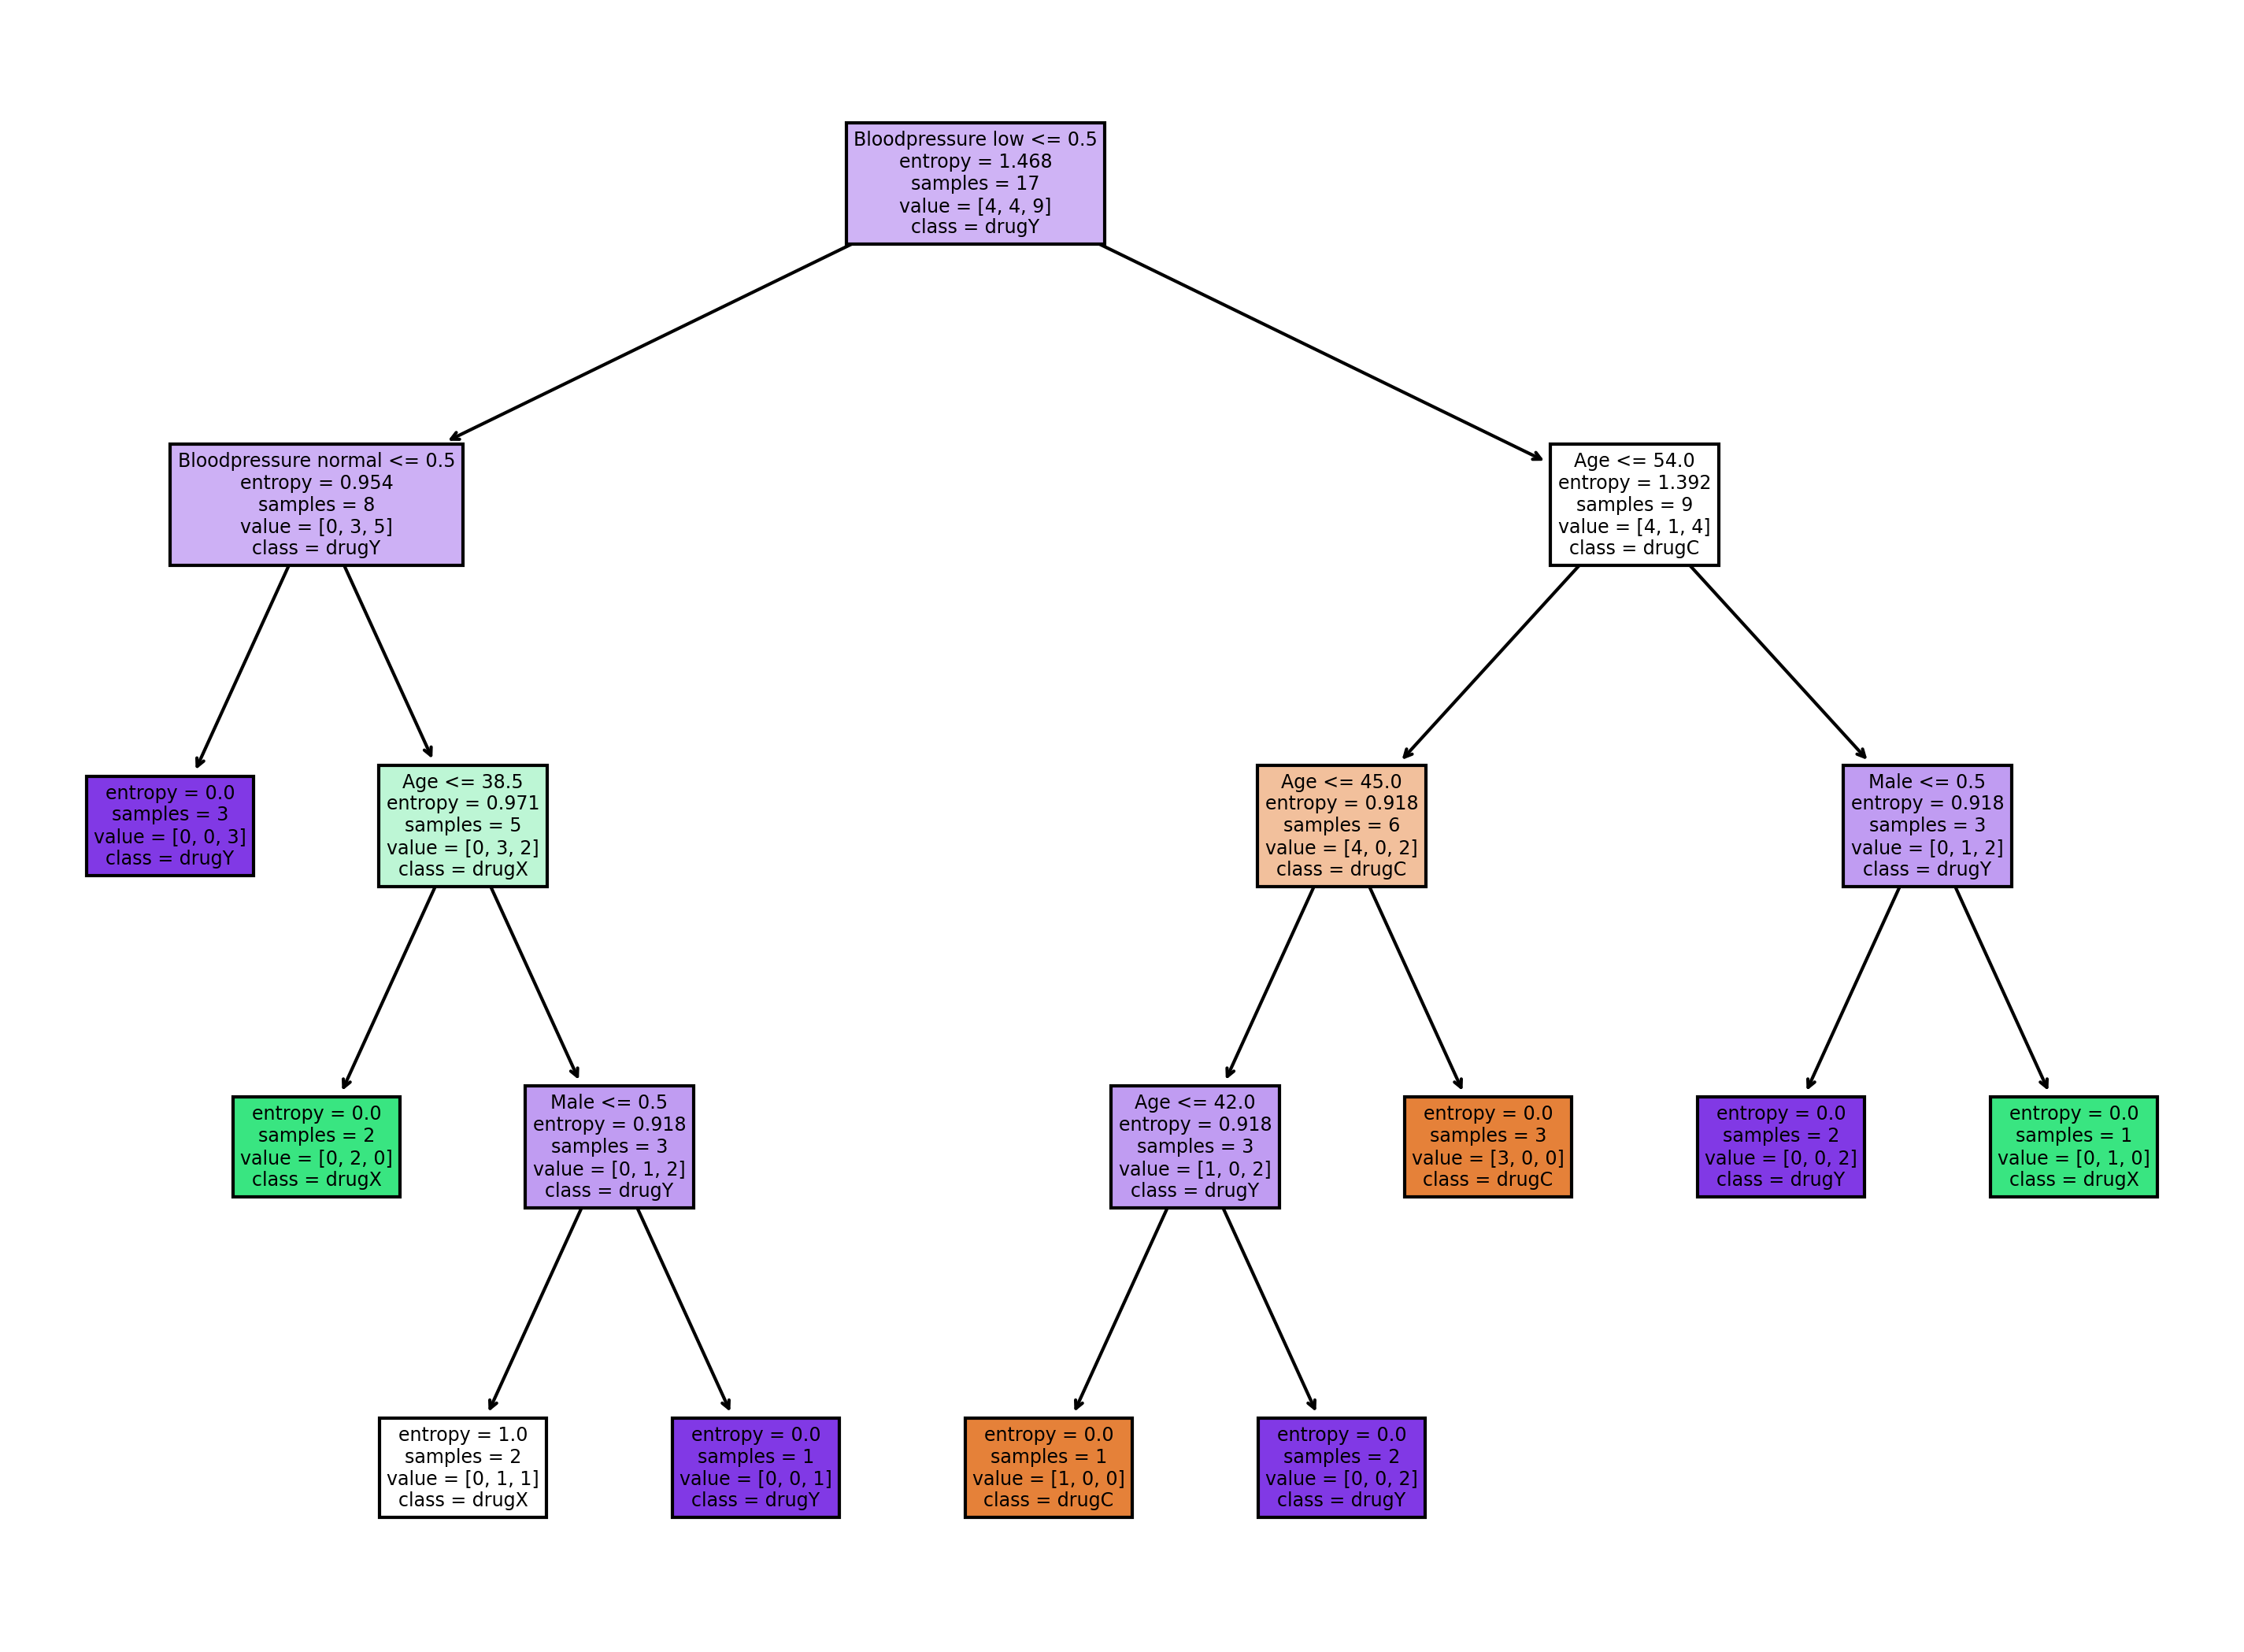

In [18]:
fn=['Age','Male','Bloodpressure low','Bloodpressure normal','Cholesterol normal']
cn=['drugC', 'drugX', 'drugY']

tree.export_graphviz(new_classifier,
                     out_file="tree1.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,9), dpi=300)
tree.plot_tree(new_classifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('new.png')

In [19]:
r = export_text(new_classifier, feature_names=X_new.columns.to_list())
print(r)

|--- bloodpressure_low <= 0.50
|   |--- bloodpressure_normal <= 0.50
|   |   |--- class: drugY
|   |--- bloodpressure_normal >  0.50
|   |   |--- Age <= 38.50
|   |   |   |--- class: drugX
|   |   |--- Age >  38.50
|   |   |   |--- Gender_M <= 0.50
|   |   |   |   |--- class: drugX
|   |   |   |--- Gender_M >  0.50
|   |   |   |   |--- class: drugY
|--- bloodpressure_low >  0.50
|   |--- Age <= 54.00
|   |   |--- Age <= 45.00
|   |   |   |--- Age <= 42.00
|   |   |   |   |--- class: drugC
|   |   |   |--- Age >  42.00
|   |   |   |   |--- class: drugY
|   |   |--- Age >  45.00
|   |   |   |--- class: drugC
|   |--- Age >  54.00
|   |   |--- Gender_M <= 0.50
|   |   |   |--- class: drugY
|   |   |--- Gender_M >  0.50
|   |   |   |--- class: drugX



# Question 5: One-leave-out method

In [20]:
display(medical_data_1)

,Age,Gender,bloodpressure,Cholesterol,Natrium,Kalium,Na/K,Drug
0,23,F,high,high,0.79,0.03,26.33,drugY
1,47,M,low,high,0.74,0.06,12.33,drugC
2,47,M,low,high,0.7,0.07,10.0,drugC
3,28,F,normal,high,0.56,0.07,8.0,drugX
4,61,F,low,high,0.56,0.03,18.67,drugY
5,22,F,normal,high,0.68,0.08,8.5,drugX
6,49,F,normal,high,0.79,0.05,15.8,drugY
7,41,M,low,high,0.77,0.07,11.0,drugC
8,60,M,normal,high,0.78,0.05,15.6,drugY
9,43,M,low,normal,0.53,0.03,17.67,drugY


In [21]:
age = medical_data_1['Age'].copy()
natrium = medical_data_1['Natrium'].copy()
kalium = medical_data_1['Kalium'].copy()
nak = medical_data_1['Na/K'].copy()
drug = medical_data_1['Drug'].copy()

to_encode = medical_data_1.copy().iloc[:,1:4]
to_encode = pd.get_dummies(to_encode,drop_first=True)
X = pd.concat([age, to_encode, natrium, kalium, nak, drug], axis=1)


In [22]:
gender_m = X['Gender_M'].copy()
bloodpressure_low = X['bloodpressure_low'].copy()
bloodpressure_normal = X['bloodpressure_normal'].copy()
cholesterol_normal = X['Cholesterol_normal'].copy()

to_encode = X.copy().iloc[:,8]
to_encode = pd.get_dummies(to_encode,drop_first=True)
X = pd.concat([gender_m, bloodpressure_low, bloodpressure_normal, cholesterol_normal, to_encode], axis=1)


In [23]:
display(X)

,Gender_M,bloodpressure_low,bloodpressure_normal,Cholesterol_normal,drugX,drugY
0,0,0,0,0,0,1
1,1,1,0,0,0,0
2,1,1,0,0,0,0
3,0,0,1,0,1,0
4,0,1,0,0,0,1
5,0,0,1,0,1,0
6,0,0,1,0,0,1
7,1,1,0,0,0,0
8,1,0,1,0,0,1
9,1,1,0,1,0,1


In [24]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from numpy import absolute


In [25]:
# create dataset
dataframe = X
data = dataframe.values
loo = LeaveOneOut()

X, y = data[:, :-1], data[:, -1]

print(X.shape, y.shape)



(17, 5) (17,)


In [26]:
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
     
    print(X_train, X_test, y_train, y_test)
    

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [0]
[[1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 1]
 [0 1 0 0 0]
 [0 0 1 0 1]
 [0 0 1 0 0]
 [1 1 0 0 0]
 [1 0 1 0 0]
 [1 1 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [1 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 1]
 [0 0 0 1 0]
 [1 1 0 1 1]] [[0 0 0 0 0]] [0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0] [1]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [1]
[[0 0 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 1]
 [0 1 0 0 0]
 [0 0 1 0 1]
 [0 0 1 0 0]
 [1 1 0 0 0]
 [1 0 1 0 0]
 [1 1 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [1 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 1]
 [0 0 0 1 0]
 [1 1 0 1 1]] [[1 1 0 0 0]] [1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0] [0]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [2]
[[0 0 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 1]
 [0 1 0 0 0]
 [0 0 1 0 1]
 [0 0 1 0 0]
 [1 1 0 0 0]
 [1 0 1 0 0]
 [1 1 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [1 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 1]
 [0 0 0 1 0]
 [1 1 0 1 1]] [[1 1 0 0 0]] [1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0] [0]
TRAIN: [ 0  1  2

In [27]:
# create model
cv = LeaveOneOut()
model = RandomForestClassifier(random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f' % (mean(scores)))


Accuracy: 0.647


END OF NOTEBOOK